# Import

## Librerie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
rel_path = "../dataset/"

In [3]:
def load_userinfo(filepath):
    df = pd.read_csv(filepath)
    df.drop(df.columns[[0, 3]], axis=1, inplace=True)
    df.columns = ['user_id', 'timezone', 'sex', 'age', 'height']
    return df

df_userinfo = load_userinfo(rel_path + "userinfo.csv")
df_userinfo.head(15)

,user_id,timezone,sex,age,height
0,fe5d7aacd82682e68d94ea1e6aa33a1e858337f7,PDT,Female,39,175
1,88359b8e24f4d6b758fb4566860ba9842fc5b350,UTC,Male,26,179
2,e061ccf5eece921027f618686a5aa2412d753b6b,PDT,Female,27,169
3,2e88aac4e69049d0845a5e2dce661ae8f4f55239,UTC,Male,61,177
4,b4e87340761e4c917db734cd52f56ed9abd0b314,UTC,Male,48,167
5,fe47edd67278f09ed33be57b5008adbbaf5cb054,UTC,Male,48,184
6,5de5c9b6cf14de18385ed689169cd99e6c379ad9,PDT,Female,44,166
7,fab1fa81eaf02d1c3bc0731fd5a2f576d1498b01,UTC,Male,55,179
8,ff32ef9b713fb27c972e8d1916680dd0ccebf646,UTC,Female,27,155
9,1c5ddfde99185d10c666b1e3c95e6559cc00ba3c,PDT,Female,28,161


In [4]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    df.drop(df.columns[[0]], axis=1, inplace=True)
    df.columns = ['user_id', 'date', 'type_data', 'value']
    return df
# type_data varia nel range 1-27 (vedere foto) (sono le feature del dataset)

df_data = load_data(rel_path + "data.csv")
df_data.head(15)

,user_id,date,type_data,value
0,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,2,86.80
1,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,3,28.96
2,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,7,117.62
3,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,8,117.86
4,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,9,117.11
5,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,10,3.89
6,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,11,22.23
7,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,12,2.93
8,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,13,2.00
9,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,14,0.82


# Data processing

Divisione del dataset originale in 27 (come le features) mini dataset.
I mini dataset sono poi riuniti per ottenere un dataset unico che per ogni riga contiene i valori di tutte le features in base a giorno e persona.
Si unisce il dataset delle features a i dati (id, sesso, eta, altezza) delle persone.

In [5]:
# split dataset nelle 27 features
num_features = 27
feature_names = [None,"steps", "weight", "BMI", "systolic blood presure", "pulse wave velocity", "pww healtiness", 
                        "heart rate avg", "heart rate min", "heart rate max", "sleep duration", "bedin"
                        ,"bedout", "nbawake", "awakeduration", "timetosleep", "timetowakeup", "lightduration",
                        "remduration", "deepduration", "activitytype", "activityduration", "activitycalories",
                        "activityhrAVG", "activityhrMIN", "activityhrMAX", "stepsgaitspeed", "distancegaitspeed"]


df_array = [] # inizializzazione array di dataset

# creazione dei 27 mini dataset inseriti in un array 
for i in range(1,num_features+1):
    # creo un array di booleani sulla base del type_data che poi utilizzo per selezionare le righe utili 
    df_mask = df_data['type_data'] == i
    df_feature_i = df_data[df_mask]
    # elimino colonna relativa a type_data
    df_feature_i.drop(df_data.columns[[2]], axis=1, inplace=True)
    # rinomino le colonne in modo tale da mettere in evidenza il nome della feature
    df_feature_i.columns=["user_id","date", feature_names[i]]
    df_array.append(df_feature_i)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWit

In [6]:
# riunisco i mini dataset in un dataset finale (MEMO ".drop_duplicates()")
df_final = df_array[0]
for i in range(1,num_features):
    df_final = df_final.merge(df_array[i], on=["user_id","date"], how="outer")
df_final.head(15)

,user_id,date,steps,weight,BMI,systolic blood presure,pulse wave velocity,pww healtiness,heart rate avg,heart rate min,...,remduration,deepduration,activitytype,activityduration,activitycalories,activityhrAVG,activityhrMIN,activityhrMAX,stepsgaitspeed,distancegaitspeed
0,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-02,2547.55,86.81,28.83,NaN,NaN,NaN,71.17,63.22,...,NaN,3.24,NaN,NaN,NaN,NaN,NaN,NaN,116.59,5.79
1,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-03,329.53,86.79,28.88,NaN,NaN,NaN,91.17,83.59,...,NaN,2.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-04,7687.18,87.71,29.31,NaN,NaN,NaN,84.59,84.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.06,5.16
3,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-05,9031.89,86.78,29.06,NaN,NaN,NaN,104.68,97.20,...,NaN,3.04,2.02,1754.56,299.16,NaN,NaN,NaN,109.84,5.44
4,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-06,15331.70,87.12,28.88,NaN,NaN,NaN,86.86,79.06,...,NaN,3.51,2.02,1863.34,170.96,NaN,NaN,NaN,113.26,5.66
5,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-07,5222.45,86.45,29.05,NaN,NaN,NaN,81.64,78.57,...,NaN,1.92,NaN,NaN,NaN,NaN,NaN,NaN,107.88,5.13
6,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-08,8577.87,86.95,29.03,NaN,NaN,NaN,72.10,53.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.85,4.38
7,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-09,11628.31,85.39,28.58,NaN,NaN,NaN,105.07,103.09,...,NaN,1.31,2.01,2231.43,234.77,NaN,NaN,NaN,106.75,5.64
8,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-10,10400.63,NaN,NaN,NaN,NaN,NaN,87.30,87.50,...,NaN,3.66,2.01,1800.07,276.09,NaN,NaN,NaN,108.77,5.40
9,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-11,6579.83,85.94,28.94,106.72,NaN,NaN,82.79,70.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.00,4.79


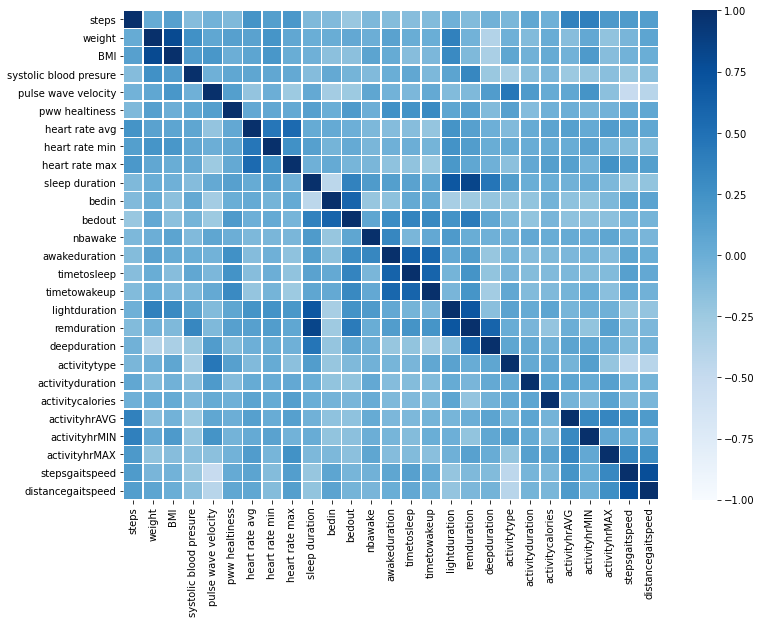

In [7]:
# plot heatmap con tutte le features
plt.figure(figsize=(12, 9))
sns.heatmap(df_final.corr(), vmin=-1, vmax=1, cmap="Blues", linewidths=.5)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [8]:
# controllo frequenza valori nulli per le varie features
nan_values = []
for feature_name in feature_names:
    if feature_name != None:
        nan_values.append(df_final[feature_name].isna().sum())

nan_values = np.array(nan_values)
nan_values = (nan_values/len(df_final))*100
nan_values_tupla = []
for i in range(1,len(feature_names)):
    nan_values_tupla.append((feature_names[i], nan_values[i-1]))

nan_values_tupla.sort(key=lambda x: x[1])
print(nan_values_tupla)
# feature scelte: [steps, bed_in, bed_out, sleep_duration, deep_duration, light_duration, nbawake, awakeduration, 
#                  timetosleep, timetowakeup]

[('steps', 3.4453457365673206), ('sleep duration', 19.748493108988605), ('bedin', 19.748493108988605), ('bedout', 19.748493108988605), ('nbawake', 19.748493108988605), ('awakeduration', 19.748493108988605), ('timetosleep', 19.748493108988605), ('timetowakeup', 19.748493108988605), ('lightduration', 19.748493108988605), ('deepduration', 19.748493108988605), ('heart rate avg', 30.700129317151053), ('heart rate min', 30.700129317151053), ('heart rate max', 30.700129317151053), ('weight', 33.93869101061845), ('BMI', 33.94292998066984), ('activitytype', 35.1209523263262), ('activityduration', 35.1209523263262), ('activitycalories', 35.1209523263262), ('stepsgaitspeed', 35.558583137399985), ('distancegaitspeed', 35.558583137399985), ('pulse wave velocity', 46.768796518697286), ('pww healtiness', 46.768796518697286), ('activityhrMIN', 46.907037215871895), ('activityhrAVG', 46.90736856393521), ('activityhrMAX', 46.90736856393521), ('remduration', 84.1650588668399), ('systolic blood presure', 8

# Selezione delle features

In [9]:
feature_names = ["user_id","date","steps", "bedin", "bedout", "sleep duration", 
                    "deepduration", "lightduration"] #"nbawake", "awakeduration"]


df_features_selected = df_final[feature_names]
#df_features_selected.head()
# size del dataframe prima del drop di tutti i valori nan
print(len(df_features_selected))
# size del dataframe dopo il drop di tutti i valori nan
df_features_selected = df_features_selected.dropna()
print(len(df_features_selected))
# size del dataframe dopo il drop delle ennuple doppie
df_features_selected = df_features_selected.drop_duplicates(subset=["user_id", "date"])
print(len(df_features_selected))
df_features_selected.head(50)


8752126
6872639
1301393


,user_id,date,steps,bedin,bedout,sleep duration,deepduration,lightduration
0,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-02,2547.55,23.78,7.82,7.76,3.24,4.49
1,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-03,329.53,23.41,6.48,6.93,2.54,4.38
3,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-05,9031.89,22.95,6.73,7.19,3.04,4.14
4,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-06,15331.70,22.44,6.18,7.61,3.51,4.14
5,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-07,5222.45,24.57,4.04,3.38,1.92,1.49
7,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-09,11628.31,23.55,5.21,5.40,1.31,4.06
8,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-10,10400.63,21.85,6.10,8.20,3.66,4.55
11,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-12,7775.70,22.15,6.40,7.79,3.78,4.00
27,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-13,11437.39,24.31,6.85,5.47,1.64,3.85
36,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-14,6772.45,24.89,5.78,4.71,1.93,2.78


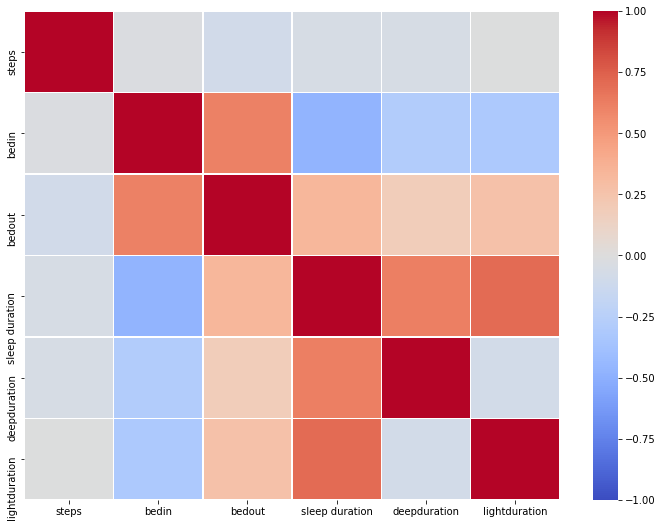

In [10]:
# plot heatmap con le features selezionate
plt.figure(figsize=(12, 9))
sns.heatmap(df_features_selected.corr(), vmin=-1,
            vmax=1, cmap="coolwarm", linewidths=.5)
plt.savefig('heatmap_features_selected.png', dpi=300, bbox_inches='tight')

In [11]:
# unione tra csv userinfo e dataset con feature selezionate
dataset = df_features_selected.merge(df_userinfo, on=["user_id"], how="left")
dataset.drop(dataset.columns[[0]], axis = 1, inplace=True)

In [12]:
# portato in valori numerici sesso e timezone:
# Male = 1 , Female = 0
# PDT = 1 , UTC = 0
dataset.loc[dataset['sex'] == 'Male', 'sex'] = 1
dataset.loc[dataset['sex'] == 'Female', 'sex'] = 0
dataset.loc[dataset['timezone'] == 'PDT', 'timezone'] = 1
dataset.loc[dataset['timezone'] == 'UTC', 'timezone'] = 0

In [13]:
dataset.head()

,date,steps,bedin,bedout,sleep duration,deepduration,lightduration,timezone,sex,age,height
0,2016-04-02,2547.55,23.78,7.82,7.76,3.24,4.49,1,1,39.0,174.0
1,2016-04-03,329.53,23.41,6.48,6.93,2.54,4.38,1,1,39.0,174.0
2,2016-04-05,9031.89,22.95,6.73,7.19,3.04,4.14,1,1,39.0,174.0
3,2016-04-06,15331.70,22.44,6.18,7.61,3.51,4.14,1,1,39.0,174.0
4,2016-04-07,5222.45,24.57,4.04,3.38,1.92,1.49,1,1,39.0,174.0


In [15]:
dataset.to_csv('dataset.csv', index=False)